In [0]:
import os 
os.chdir('/content/drive/My Drive/Colab_Notebooks/Courses/DeepLearning_Baharan/Session_10')

In [0]:
%tensorflow_version 1.x
!pip install mtcnn
!pip install keras_vggface

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mtcnn
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.preprocessing import image
from scipy.spatial.distance import cosine

In [0]:
detector = mtcnn.MTCNN()
model = VGGFace(include_top=False,
                model='senet50', 
                pooling='avg',
                input_shape=(224, 224, 3))

In [0]:
model.summary()

In [0]:
def get_encoding(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes = detector.detect_faces(img)
    if boxes:
        box = max(boxes, key=lambda box_: box_['box'][2]* box_['box'][3])
        x1, y1, width, height = box['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        face = img[y1: y2, x1: x2]
        face = cv2.resize(face, (224, 224))
        face = image.img_to_array(face)
        face = preprocess_input(face, version=2)
        batch_face = np.expand_dims(face, axis=0)
        encoding = model.predict(batch_face)[0]
        return encoding 
    return None

In [0]:
base_folder = 'Faces'
encodings = dict()
for name in os.listdir(base_folder):
    name_path = os.path.join(base_folder, name)
    for pic_name in os.listdir(name_path):
        pic_path = os.path.join(name_path, pic_name)
        img = cv2.imread(pic_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = detector.detect_faces(img)
        if boxes:
            box = max(boxes, key=lambda box_: box_['box'][2]* box_['box'][3])
            x1, y1, width, height = box['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height

            face = img[y1: y2, x1: x2]
            face = cv2.resize(face, (224, 224))
            face = image.img_to_array(face)
            face = preprocess_input(face, version=2)
            batch_face = np.expand_dims(face, axis=0)
            encoding = model.predict(batch_face)[0]
            encodings[name] = encoding

In [0]:
encodings.keys()

dict_keys(['MirHosseini', 'Ameri', 'HamidReza', 'PourHeidary', 'Bedrosian', 'Mohammadi', 'Hashemi', 'Ahmadi'])

In [0]:
# Verification
def verify(name, img_path, t):
    base_encoding = encodings[name]
    test_encoding = get_encoding(img_path)
    distance = cosine(base_encoding, test_encoding)
    print(distance)
    if distance < t:
        return True
    else:
        return False

In [0]:
hamid_path = '/content/drive/My Drive/Colab_Notebooks/Courses/DeepLearning_Baharan/Session_10/Test/hamidreza/photo_2020-02-15_14-45-00.jpg'
verify('Mohammadi', hamid_path, t=0.3)

0.44267064332962036


False

In [0]:
# Recognition

In [0]:
t = 0.3
img_path = '/content/drive/My Drive/Colab_Notebooks/Courses/DeepLearning_Baharan/Session_10/Test/ahmadi_hashemi/photo_2020-02-15_15-11-02.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
boxes = detector.detect_faces(img)
if boxes:
    for box in boxes:
        x1, y1, width, height = box['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        face = img[y1: y2, x1: x2]
        face = cv2.resize(face, (224, 224))
        face = image.img_to_array(face)
        face = preprocess_input(face, version=2)
        batch_face = np.expand_dims(face, axis=0)
        base_encoding = model.predict(batch_face)[0]
        
        
        name = None
        distance = float('inf')
        for name_, db_encode in encodings.items():
            dist = cosine(base_encoding, db_encode)
            if dist < distance:
                distance = dist
                name = name_
        if distance < t:
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), thickness = 2)
            cv2.putText(img,
                        name + f'_{distance:2f}', 
                        (x1, y1),
                        cv2.FONT_HERSHEY_PLAIN,
                        1,
                        color=(0, 255, 0), )
        else:
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), thickness = 2)
            cv2.putText(img,
                        '?' + f'_{distance:2f}_closest_{name}', 
                        (x1, y1),
                        cv2.FONT_HERSHEY_PLAIN,
                        1,
                        color=(255, 0, 0), )

img_ = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('hashemi.png', img_)

True

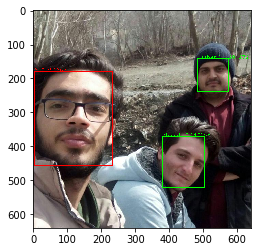

In [0]:
plt.imshow(img)

In [0]:
distances

inf